# Analysis of political text, it's vectorization etc.

**Step 1: Load text from dataset and store political words in a list**

In [27]:
# imports section 
import csv
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

import numpy as np
import matplotlib.pyplot as plt
import math
import random

import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [13]:
words = []
common_words = [
    "the", "be", "to", "of", "and", "a", "in", "that", "have", "i", "it", "for", "not", "on", "with",
    "he", "as", "you", "do", "at", "this", "but", "his", "by", "from", "they", "we", "say", "her", "she",
    "or", "an", "will", "my", "one", "all", "would", "there", "their", "what", "so", "up", "out", "if",
    "about", "who", "get", "which", "go", "me", "when", "make", "can", "like", "time", "no", "just",
    "him", "know", "take", "people", "into", "year", "your", "good", "some", "could", "them", "see",
    "other", "than", "then", "now", "look", "only", "come", "its", "over", "think", "also", "back",
    "after", "use", "two", "how", "our", "work", "first", "well", "way", "even", "new", "want", "because",
    "any", "these", "give", "day", "most", "us"
]

lemmatizer = WordNetLemmatizer()

with open("../resources/political/political_social_media.csv", newline="", encoding="utf8", errors="ignore") as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        for token in row[20].split(' '):
            word_lemmatized = lemmatizer.lemmatize(token.lower())
            if word_lemmatized not in common_words:
                words.append(word_lemmatized)

print(words[:50])

['text', 'rt', '@nowthisnews:', 'rep.', 'trey', 'radel', '(r-', '#fl)', 'slam', '#obamacare.', '#politics', 'https://t.co/zvywmg8yih', 'video', '-', '#obamacare:', '', 'full', 'higher', 'cost', 'broken', 'promises:', 'http://t.co/dn3vzqirwf', 'please', 'join', 'today', 'remembering', 'fallen', 'hero', 'honoring', 'men', 'woman', 'currently', 'military', 'service', 'sacrifices.', 'rt', '@senatorleahy:', '1st', 'step', 'toward', 'senate', 'debate', 'leahy-crapo', '#vawa', 'bill', 'is', 'senate�۪s', 'procedural', 'vote', 'today']


**TODO:**
1. Improve filtering of political words! (may be find better datasets with political words)
2. RF feature extraction + SVM
3. Variability Analysis, statistics (ask for a good book in statistics)
4. Our word vectorizations follow normal distribution -> we have to use it 
5. FL automated rule generation
6. 
7. 
8. 

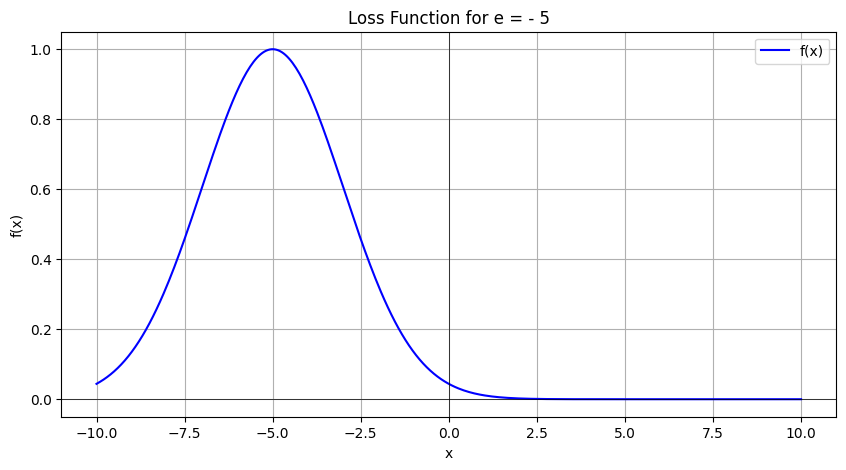

In [24]:
# rate function

def f(x):
    return np.exp(- ((x + 5 )**2) / 8)

x = np.linspace(-10, 10, 400)  # 400 points for smooth plotting
y = f(x)  # Compute y values

plt.figure(figsize=(10, 5))
plt.plot(x, y, label="f(x)", color="blue")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Loss Function for e = - 5")
plt.axhline(0, color="black", linewidth=0.5)  # X-axis
plt.axvline(0, color="black", linewidth=0.5)  # Y-axis
plt.legend()
plt.grid(True)
plt.show()

def loss_function(x, e):
    return np.exp(- ((x - e)**2) / 2)

['excited high or calm low then negative', 'sad high and excited medium then high_negative']
-5.372046893347531e-17


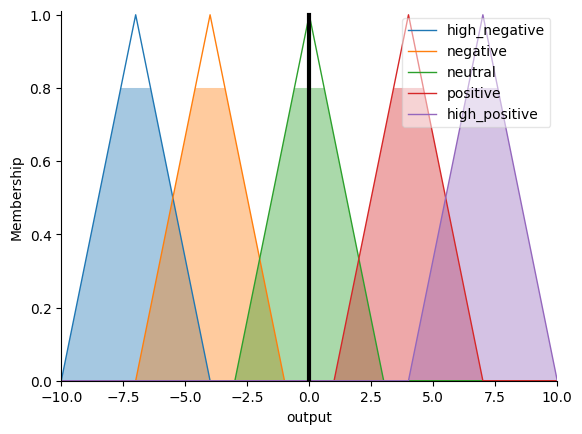

In [ ]:
validation_array = [
    [[0.1, 0.1, 0.9, 0.9, 0.1, 0.1], -5 ],
    [[0.9, 0.9, 0.1, 0.1, 0.1, 0.1], -8 ],
    [[0.1, 0.1, 0.1, 0.1, 0.9, 0.9], 9 ]
]

data_array = [row[0] for row in validation_array]

moods_dict = {0: "angry", 1: "worried", 2: "sad", 3: "calm", 4: "happy", 5: "excited"}
moods_indeces = {y.lower(): x for x, y in moods_dict.items()}

moods = ["angry", "worried", "sad", "calm", "happy", "excited"]
mood_score = ["low", "medium", "high"]
predicator = ["or", "and"]
output_score = ["high_negative", "negative", "neutral", "positive", "high_positive"]

# initial population generation:
population_size = 100
# initial_population = ["angry medium and worried medium and sad medium and calm medium and happy medium and excited medium then neutral"]
initial_population = ["angry medium and worried medium and sad medium and calm medium and happy medium and excited medium then neutral"]

for i in range(population_size):
    rule = moods[random.randint(0, len(moods) - 1)] + " " + mood_score[random.randint(0, len(mood_score) - 1)] + " " + predicator[random.randint(0, len(predicator) - 1)] + " " + moods[random.randint(0, len(moods) - 1)] + " " + mood_score[random.randint(0, len(mood_score) - 1)] + " then " + output_score[random.randint(0, len(output_score) - 1)]
    initial_population.append(rule)

print(initial_population[:2])

emotion_intensity = np.arange(0, 11, 1)  # This could represent 0 to 10 scale of intensity
output_score = np.arange(-10, 11, 1)     # This could represent a score from -10 (Highly Negative) to 10 (Highly Positive)

antecedents = []

# Create the fuzzy variables for inputs and output
for i in range(len(moods_dict)):
    antecedents.append(ctrl.Antecedent(emotion_intensity, moods_dict[i]))

output = ctrl.Consequent(output_score, 'output')

# Define fuzzy sets and membership functions for each variable
for item in antecedents:
    item.automf(names=['low', 'medium', 'high'])


output['high_negative'] = fuzz.trimf(output_score, [-10, -7, -4])
output['negative'] = fuzz.trimf(output_score, [-7, -4, -1])
output['neutral'] = fuzz.trimf(output_score, [-3, 0, 3])
output['positive'] = fuzz.trimf(output_score, [1, 4, 7])
output['high_positive'] = fuzz.trimf(output_score, [4, 7, 10])

# Define fuzzy rules
rules = []

for rule in initial_population[:50]:
    predicates = rule.lower().split(' ')
    ant_predicates = antecedents[moods_indeces[predicates[0]]][predicates[1]]
    i = 2
    while i < len(predicates) - 2:
        if predicates[i] == 'or':
            ant_predicates = ant_predicates | antecedents[moods_indeces[predicates[i+1]]][predicates[i+2]]
        else:
            ant_predicates = ant_predicates & antecedents[moods_indeces[predicates[i+1]]][predicates[i+2]]
        i += 3
    rules.append(ctrl.Rule(ant_predicates, output[predicates[len(predicates) - 1]]))

# Create the control system and simulation
emotion_ctrl = ctrl.ControlSystem(rules)
emotion_sim = ctrl.ControlSystemSimulation(emotion_ctrl)

# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
for i,aggregated_mood in enumerate(data_array[0]):
    emotion_sim.input[moods_dict[i]] = (aggregated_mood) * 10

# Crunch the numbers
emotion_sim.compute()

print(emotion_sim.output['output'])
output.view(sim=emotion_sim)